# basic plot of ADCIRC max water level for NSF-HSEES
##Ensemble member number is set in "ens", and can be iterated over to load all ensemble members.  Note that the ADCIRC grid does not change between ensemble members, and so the part that gets the lon, lat, elements can be done once.  

## exercise:  make a plot (template below) of the MOM for this Experiment.  I.e., the max across all maxes for the ensembles 1-21.

In [1]:
from pylab import *
import matplotlib.tri as Tri
import matplotlib.pyplot as plt
import netCDF4
import datetime
import time
import sys
%matplotlib inline

In [2]:
#  this is the THREDDS url to the Isabel Experiment #1, ensemble 01.  
def getURL (ensemble):
    url_base='http://opendap.renci.org:1935/thredds/dodsC/Experiments/Isabel_ex1/ADCIRC/12km/n%02d/maxele.63.nc'
    url=url_base % ensemble
    return url
ens=1
url = getURL(ens)
print url

http://opendap.renci.org:1935/thredds/dodsC/Experiments/Isabel_ex1/ADCIRC/12km/n01/maxele.63.nc


In [3]:
# get ADCIRC grid parts;  this need ony be done once, as it can be time-comsuming over the network
nc=netCDF4.Dataset(url)
print nc.variables.keys()
lon = nc.variables['x'][:]
lat = nc.variables['y'][:]
nv = nc.variables['element'][:,:] -1
tri = Tri.Triangulation(lon,lat, triangles=nv)
latmin = np.mean(lat)  # needed for scaling lon/lat plots


[u'time', u'x', u'y', u'element', u'adcirc_mesh', u'neta', u'nvdll', u'max_nvdll', u'ibtypee', u'nbdv', u'nvel', u'nvell', u'max_nvell', u'ibtype', u'nbvv', u'depth', u'zeta_max', u'time_of_zeta_max']


In [14]:
# This gets the data associated with the variable;  this part should be looped over to load the sequence of ensembles; 
# this means looping over ens=1:21 and building the url each time.
vname='zeta_max'
var = nc.variables[vname]
var_d=var[:]
mom=np.zeros(var_d.shape)
print mom.shape

(624782,)


In [15]:
#To make it easier to run, I added these here to prevent incorrect run numbers
for ens in range(0,21):
    ensp1=ens+1
    url = getURL(ensp1)
    print "Ensemble " + str(ensp1)
    print '   ' + url
    nc=netCDF4.Dataset(url)  # get new nc object for each ens 
    var = nc.variables[vname]
    var_d=var[:]
    maxv=np.max(var_d)
    print '   ' + str(maxv)
    mom=np.maximum(mom,var_d)
print 'Maximum in Mom array : ' + str(np.max(mom))


Ensemble 1
   http://opendap.renci.org:1935/thredds/dodsC/Experiments/Isabel_ex1/ADCIRC/12km/n01/maxele.63.nc
   11.1201056899
Ensemble 2
   http://opendap.renci.org:1935/thredds/dodsC/Experiments/Isabel_ex1/ADCIRC/12km/n02/maxele.63.nc
   10.7202431425
Ensemble 3
   http://opendap.renci.org:1935/thredds/dodsC/Experiments/Isabel_ex1/ADCIRC/12km/n03/maxele.63.nc
   10.7180298449
Ensemble 4
   http://opendap.renci.org:1935/thredds/dodsC/Experiments/Isabel_ex1/ADCIRC/12km/n04/maxele.63.nc
   10.7161949855
Ensemble 5
   http://opendap.renci.org:1935/thredds/dodsC/Experiments/Isabel_ex1/ADCIRC/12km/n05/maxele.63.nc
   10.7204144298
Ensemble 6
   http://opendap.renci.org:1935/thredds/dodsC/Experiments/Isabel_ex1/ADCIRC/12km/n06/maxele.63.nc
   10.7347727643
Ensemble 7
   http://opendap.renci.org:1935/thredds/dodsC/Experiments/Isabel_ex1/ADCIRC/12km/n07/maxele.63.nc
   10.7195450955
Ensemble 8
   http://opendap.renci.org:1935/thredds/dodsC/Experiments/Isabel_ex1/ADCIRC/12km/n08/maxele.63.nc
 

In [18]:
# put nans where mom==0
print mom[-1]
print np.where(mom<1.e-6)
mom[np.where(mom<1.e-6)]=mom[-1]

--
(array([     0,    877,    878, ..., 624779, 624780, 624781]),)


Making contours in figure ...
Calling tricontourf  ...
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.]


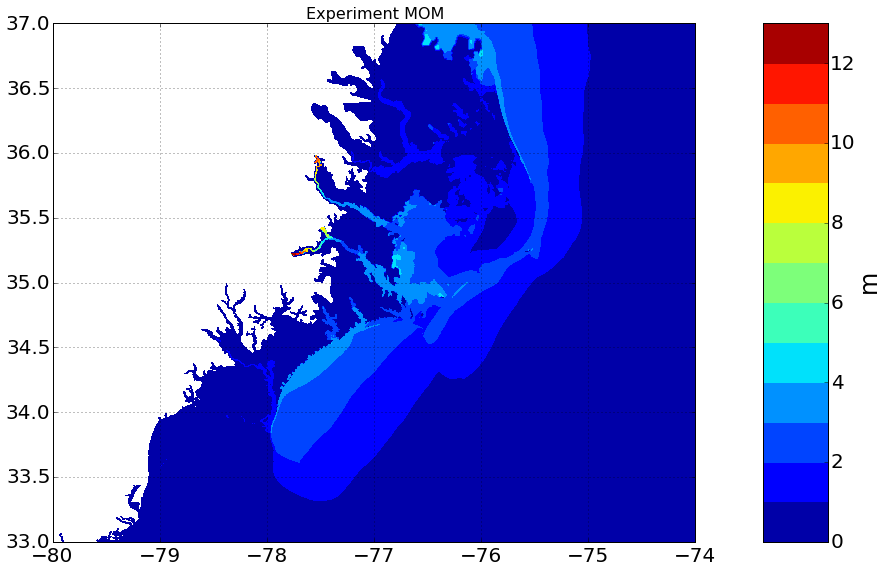

In [24]:
print 'Making contours in figure ...'
fig = plt.figure(figsize=(18,9), dpi=144)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
ax.set_aspect(1.0 / np.cos(latmin * np.pi / 180.0))

print 'Calling tricontourf  ...'
vmax=np.ceil(np.max(mom))
levels = linspace(0.,vmax,vmax+1)
print levels
contour = tricontourf(tri, mom,levels=levels,shading='faceted')
plt.grid(True)
plt.xlim((-80,-74))
plt.ylim((33,37))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Experiment MOM', fontsize=16)

# add colorbar
cbax = fig.add_axes([0.80, 0.1, 0.05, 0.8]) 
cb = plt.colorbar(contour, cax=cbax,  orientation='vertical')
cb.set_label(var.units, fontsize=24)
cb.ax.tick_params(axis='both', which='major', labelsize=20)